In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [181]:
records_1 = pd.read_csv("request_logs.csv")
records_2 = pd.read_csv("request_logs1.csv")
merged = pd.read_csv("merged_request_logs.csv")

In [3]:
merged.head(-5)

,name,username,email,response_time,request
0,oNIHdciiaq,xHOKYveSFn,POZmQNFocE@test.com,0.078,1
1,jH15OWvQAT,64nIG1tbS9,iJVKV8ARo6@test.com,0.009,2
2,ItfhzrV0ta,R1G71cqJZ6,0LuCO2PwKE@test.com,0.008,3
3,Tg0HOMLviC,Ewta1LxVb9,ZZY6AUZYMK@test.com,0.006,4
4,gOxCBeXcX4,PhoM6em4mJ,g8knXVNe7Y@test.com,0.007,5
...,...,...,...,...,...
199990,aNOrwls4xp,n7rnxieW4Y,NbAp1KA52c@test.com,0.003,199991
199991,OUqcybqd0N,uSUmnGIJes,XK4kFv9Qpi@test.com,0.004,199992
199992,At6LFVwK3P,VhYPxTSBIV,951FZV9LCX@test.com,0.004,199993
199993,2KI3Pa9jo8,oB3j4DY2DK,yMMLteQjM9@test.com,0.005,199994


In [13]:
# merging with ID number
# DO NOT RUN THIS CELL
# not required anymore!
merged['request'] = range(1, len(merged) + 1)
merged.to_csv("merged_request_logs.csv", index=False)
# not required anymore!

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='request', y='response_time', data=merged, palette='viridis')
plt.title('Response Time by Request')
plt.xlabel('Request')
plt.ylabel('Response Time')
plt.show()

In [ ]:
heatmap_data = merged.pivot('request', 'name', 'response_time')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".3f")
plt.title('Response Time Heatmap')
plt.xlabel('Name')
plt.ylabel('Request')
plt.show()

In [7]:
merged.dtypes

name              object
username          object
email             object
response_time    float64
request            int64
dtype: object

In [182]:
X = merged.drop(columns=['name', 'username', 'email', 'response_time'])
y = merged['response_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [183]:
# Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

predictions = linear_reg_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.0007885920291645e-06


In [184]:
# Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

decision_tree_predictions = decision_tree_model.predict(X_test)

decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
print("Decision Tree Mean Squared Error:", decision_tree_mse)


Decision Tree Mean Squared Error: 8.021942249999999e-06


In [185]:
# Random Forest Model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

random_forest_predictions = random_forest_model.predict(X_test)

random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
print("Random Forest Mean Squared Error:", random_forest_mse)

Random Forest Mean Squared Error: 6.1741896922249995e-06


In [186]:
# Predicting the processing time of 200005th request
request_value = 2000005
linearModel = []
request_points = [1,100,1000,10000,100000,1000000,10000000, 100000000, 1000000000, 10000000000]

for i in range(request_value, request_value+10):
    request_value_2d = np.array([i]).reshape(-1, 1)
    predicted_response_time = linear_reg_model.predict(request_value_2d)
    print(f"Predicted Response Time for the {i} request:", predicted_response_time)
for x in request_points:
    request_value_2d = np.array([x]).reshape(-1, 1)
    predicted_response_time = linear_reg_model.predict(request_value_2d)
    linearModel.append(predicted_response_time)

print(len(linearModel))

Predicted Response Time for the 2000005 request: [0.00864741]
Predicted Response Time for the 2000006 request: [0.00864741]
Predicted Response Time for the 2000007 request: [0.00864741]
Predicted Response Time for the 2000008 request: [0.00864741]
Predicted Response Time for the 2000009 request: [0.00864741]
Predicted Response Time for the 2000010 request: [0.00864742]
Predicted Response Time for the 2000011 request: [0.00864742]
Predicted Response Time for the 2000012 request: [0.00864742]
Predicted Response Time for the 2000013 request: [0.00864742]
Predicted Response Time for the 2000014 request: [0.00864742]
10


c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not

In [187]:
# Predicting the processing time of 200005th request with random forest
request_value = 2000005
randomForest = []

for i in range(request_value, request_value+10):
    request_value_2d = np.array([i]).reshape(-1, 1)
    predicted_response_time = random_forest_model.predict(request_value_2d)
    print(f"Predicted Response Time for the {i} request:", predicted_response_time)

for i in request_points:
    request_value_2d = np.array([i]).reshape(-1, 1)
    predicted_response_time = random_forest_model.predict(request_value_2d)
    randomForest.append(predicted_response_time)

Predicted Response Time for the 2000005 request: [0.00409]
Predicted Response Time for the 2000006 request: [0.00409]
Predicted Response Time for the 2000007 request: [0.00409]
Predicted Response Time for the 2000008 request: [0.00409]
Predicted Response Time for the 2000009 request: [0.00409]
Predicted Response Time for the 2000010 request: [0.00409]
Predicted Response Time for the 2000011 request: [0.00409]
Predicted Response Time for the 2000012 request: [0.00409]


c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: Use

Predicted Response Time for the 2000013 request:

c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: Use

 [0.00409]
Predicted Response Time for the 2000014 request: [0.00409]


c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [188]:
# Predicting the processing time of 200005th request with decision tree
request_value = 2000005
decisionTree = []

for i in range(request_value, request_value+10):
    request_value_2d = np.array([i]).reshape(-1, 1)
    predicted_response_time = decision_tree_model.predict(request_value_2d)
    print(f"Predicted Response Time for the {i} request:", predicted_response_time)

for i in request_points:
    request_value_2d = np.array([i]).reshape(-1, 1)
    predicted_response_time = decision_tree_model.predict(request_value_2d)
    decisionTree.append(predicted_response_time)

c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\EdwardZephyr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: Use

Predicted Response Time for the 2000005 request: [0.004]
Predicted Response Time for the 2000006 request: [0.004]
Predicted Response Time for the 2000007 request: [0.004]
Predicted Response Time for the 2000008 request: [0.004]
Predicted Response Time for the 2000009 request: [0.004]
Predicted Response Time for the 2000010 request: [0.004]
Predicted Response Time for the 2000011 request: [0.004]
Predicted Response Time for the 2000012 request: [0.004]
Predicted Response Time for the 2000013 request: [0.004]
Predicted Response Time for the 2000014 request: [0.004]


[1, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000] [0.004958619898150941, 0.004958802492762314, 0.004960462443774792, 0.004977061953899575, 0.005143057055147413, 0.006803008067625787, 0.02340251819240953, 0.18939761944024694, 1.849348631918621, 18.44885875670236]


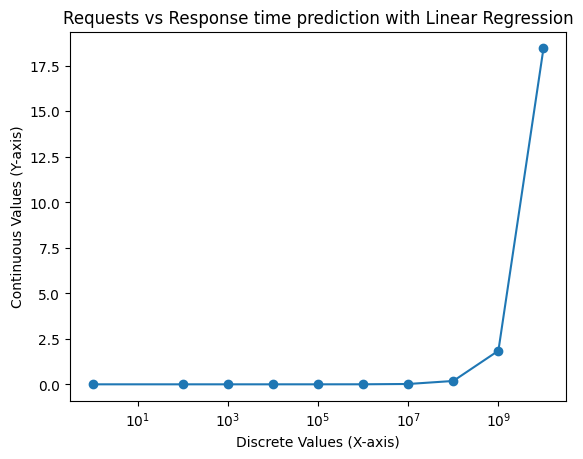

In [189]:
import matplotlib.pyplot as plt

# Define your data
x = request_points
_y = []
for i in linearModel:
    _y.append(i[0])

print(x,_y)
# Create the line plot
plt.plot(x, _y, marker='o')

# Set logarithmic scale for x-axis
plt.xscale('log')

# Add labels and title
plt.xlabel('Discrete Values (X-axis)')
plt.ylabel('Continuous Values (Y-axis)')
plt.title('Requests vs Response time prediction with Linear Regression')

# Show the plot
plt.show()


[1, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000] [0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.006, 0.006, 0.006, 0.078]


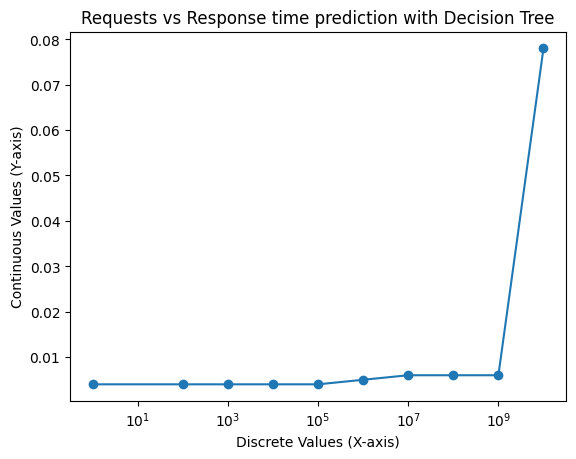

In [190]:
import matplotlib.pyplot as plt

# Define your data
x = request_points
_y = []
for i in decisionTree:
    _y.append(i[0])
_y = _y[::-1]
print(x,_y)
# Create the line plot
plt.plot(x, _y, marker='o')

# Set logarithmic scale for x-axis
plt.xscale('log')

# Add labels and title
plt.xlabel('Discrete Values (X-axis)')
plt.ylabel('Continuous Values (Y-axis)')
plt.title('Requests vs Response time prediction with Decision Tree')

# Show the plot
plt.show()


[1, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000] [0.004090000000000003, 0.004090000000000003, 0.004090000000000003, 0.004090000000000003, 0.004090000000000003, 0.0072300000000000055, 0.005660000000000004, 0.0066600000000000045, 0.0056200000000000035, 0.05440000000000003]


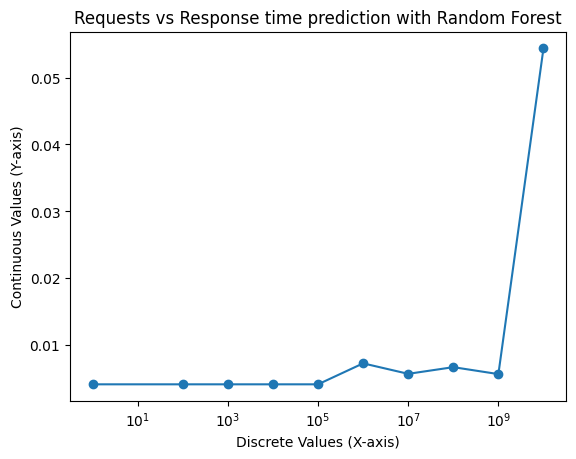

In [191]:
import matplotlib.pyplot as plt

# Define your data
x = request_points
_y = []
for i in randomForest:
    _y.append(i[0])
_y = _y[::-1]
print(x,_y)
# Create the line plot
plt.plot(x, _y, marker='o')

# Set logarithmic scale for x-axis
plt.xscale('log')

# Add labels and title
plt.xlabel('Discrete Values (X-axis)')
plt.ylabel('Continuous Values (Y-axis)')
plt.title('Requests vs Response time prediction with Random Forest')

# Show the plot
plt.show()


In [192]:
merged.max()

name                      zzzbktmolE
username                  zzzuFfgcXJ
email            zzzqpCmB9Y@test.com
response_time                  0.207
request                       200000
dtype: object